# Data and Sampling Distributions

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

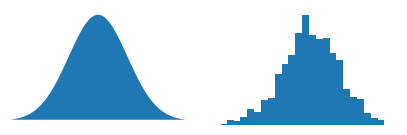

In [45]:
np.random.seed(1)
x=np.linspace(-3,3,300)
xs=stats.norm.rvs(size=1000)
f,axes=plt.subplots(ncols=2,figsize=(5,1.5))
ax = axes[0]
ax.fill(x,stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax = axes[1]
ax.hist(xs, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
plt.show()

## Sampling Distribution of a Statistic

In [61]:
loans_income=pd.read_csv(r'G:\data_science\data\loans_income.csv').squeeze('columns')
sample_data=pd.DataFrame({
    'income':loans_income.sample(1000),
    'type':'Data',
})
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results.head()

,income,type
10879,26053.0,Data
8300,28000.0,Data
25179,45000.0,Data
20632,45000.0,Data
42450,64000.0,Data


g:\data_science\DS\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


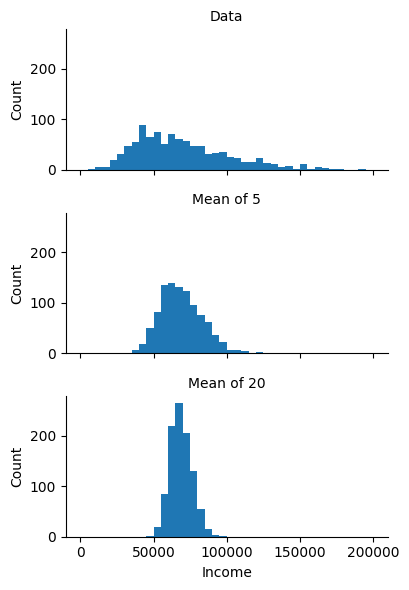

In [56]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

# The Bootstrap

In [ ]:
results=[]
for i in range(1000):
    sample=resample(loans_income)
    results.append(sample.median())
results=pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'Sample : {results.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')



Bootstrap Statistics:
original: 62000.0
Sample : 62000.0
bias: 0.0
std. error: 218.88423860550103


In [1]:
print(loans_income.mean())
np.random.seed(seed=3)
sample20=resample(loans_income,n_samples=20)

NameError: name 'loans_income' is not defined